In [1]:
import h5py
import numpy as np

In [11]:
f = h5py.File("./test_no_pile_5000000.h5",'r')
[i for i in f]
# treeArray = f['features'][()]
# len(treeArray[:,0])



['features', 'targets']

In [45]:
def isinteger(x):
    return np.equal(np.mod(x, 1), 0)

def within(v, lm):
    return (lm[0]<=v)&(v<lm[1])
    
def matrix_rep(a, bins=32, R = 0.4, limit = False):
    if (not limit):
        limit = np.array((-R,R))
    else:
        limit = np.array(limit)
        
    if (not isinteger(np.log2(bins))):
        print("You should use 2^n bins for integer n ")
    
    dl = (limit[1]-limit[0])/bins
    
    matrix = [] 
    for k in a:
        b = bins
        vlb  = limit[0]
        vub = limit[1]
        if not within(k, limit):
            matrix.append(-1)
        else:
            while(b!=1):
                b = b//2
                r1 = (vlb, (vlb+vub)/2)
                r2 = ((vlb+vub)/2, vub)
                if within(k,r1):
                    vub = (vlb+vub)/2
                if within(k,r2):
                    vlb = (vlb+vub)/2
                if b==1:
                    matrix.append((vlb-limit[0])/dl)
                    break
    return matrix
            
            
            
    
    
    
    
    
        
    

In [25]:
targets = f['targets'][()]
features = f['features'][()]
j0 = np.array([features[i] for i in range(len(features)) if targets[i]==0])
j1 = np.array([features[i] for i in range(len(features)) if targets[i]==1])

In [26]:
j0[:,0]

array([17.1676, 52.9099, 22.9799, ..., 43.7291, 34.513 , 18.5032],
      dtype=float32)

In [21]:
import matplotlib.pyplot as plt

<Figure size 576x576 with 0 Axes>

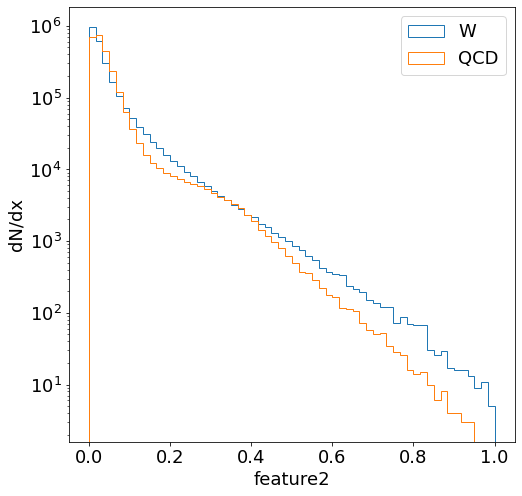

In [59]:
plt.figure(figsize=(8,8))
n = 2
bins = 20
fs=18
tagsize = 18
plt.figure(figsize=(8,8))
bins2 = 60
x1, x2 = 0,1
# plt.subplot(1,4,1)
plt.hist(j0[:,n],bins=bins2, histtype='step', range=[x1, x2], label='W')
plt.hist(j1[:,n],bins=bins2, histtype='step', range=[x1, x2], label='QCD')

plt.legend(prop={'size': tagsize})
# plt.legend()
plt.yscale('log')
plt.xlabel("feature"+str(n), fontsize=fs)  
plt.ylabel("dN/dx", fontsize=fs)
plt.xticks(fontsize=fs)  
plt.yticks(fontsize=fs)
plt.savefig("./jet_highlevel_features_"+str(n)+".png")

In [24]:
bins = np.array([(-32,32),(26,26)])
bins/32

array([[-1.    ,  1.    ],
       [ 0.8125,  0.8125]])

In [16]:
[treeArray['j1_pt'][i] for i in range(len(treeArray['index'])) if treeArray['j_g'][i]==1]

[125.65559,
 101.354225,
 82.84054,
 82.44367,
 68.173386,
 51.578854,
 50.652264,
 43.42904,
 33.746365,
 30.362007,
 29.396357,
 29.208647,
 27.363213,
 25.24826,
 21.403942,
 21.335077,
 20.9253,
 18.797535,
 17.851297,
 16.807901,
 16.064693,
 10.87488,
 10.852707,
 9.989466,
 9.919119,
 9.598252,
 6.7847414,
 5.8113403,
 5.776829,
 5.1796007,
 4.619695,
 4.6107354,
 4.558647,
 4.0993853,
 3.6706464,
 3.651048,
 3.3873477,
 2.8651748,
 2.3776302,
 2.203034,
 1.7050962,
 1.6385757,
 1.4178141,
 1.3158634,
 1.2346005,
 1.2330152,
 1.1846426,
 0.76775515,
 0.7385341,
 0.4429353,
 0.40131456,
 0.35277426,
 0.20668204,
 0.15838498,
 5.918363e-12,
 115.63916,
 110.373085,
 109.39012,
 100.34847,
 90.20852,
 90.19825,
 77.58134,
 56.851837,
 44.872295,
 29.819141,
 27.62662,
 26.237358,
 23.211763,
 15.549326,
 14.374866,
 13.650666,
 12.822576,
 12.127362,
 10.250889,
 9.916424,
 9.863905,
 9.015369,
 8.85646,
 8.204413,
 7.1656866,
 6.6170344,
 6.3581777,
 5.99549,
 5.6396008,
 5.246348

In [13]:
treeArray['j_q']

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)